In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial #To cumopute distance between each pair of the two collections of inputs.
import operator #to perform comparisons between e.g it(a,b) is equal to a<b
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.simplefilter("ignore")

# tabloları ekleyim elimizdeki veriler bakıyoruz ve tabloları ilişkilerine göre birleştiriyoruz

## u.data ekliyip ilk 10 tanesine bakalım

In [32]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t',names= columns )
ratings.head(10)

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [33]:
ratings.shape

(100000, 4)

## u.item ekliyip ilk 10 tanesine bakalım

In [34]:
# importing the u.item dataset
movie_titles = ['movieid', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'action', 'adventure','animation','childrens', 'comedy','crime','documentary','drama','fantasy','film-nior','horror','musical','mystery','romance','sci-fi','thriler','war','westen']
titles = pd.read_csv('ml-100k/u.item', sep='|',encoding='latin-1', names= movie_titles)
titles.head(10)

,movieid,movie title,release date,video release date,IMDb URL,unknown,action,adventure,animation,childrens,...,fantasy,film-nior,horror,musical,mystery,romance,sci-fi,thriler,war,westen
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
titles.shape

(1682, 24)

## u.genre ekliyip ilk 10 tanesine bakalım

In [36]:
genType = ['type','genreid']
genre = pd.read_csv('ml-100k/u.genre',sep='|',names=genType)
genre.head(10)

,type,genreid
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [37]:
genre.shape

(19, 2)

## u.user ekliyip ilk 10 tanesine bakalım

In [38]:
user_info = ['userid', 'age', 'gender','occupations','zip code']
users = pd.read_csv('ml-100k/u.user',sep='|',encoding='latin-1', names= user_info)
users.head(10)

,userid,age,gender,occupations,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [39]:
users.shape

(943, 5)

## u_data ile u_user birleştirip sıralıyoruz

In [40]:
ratings = pd.merge(ratings, users, on= 'userid')# userid'e göre
ratings.head()

,userid,movieid,rating,timestamp,age,gender,occupations,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [41]:
ratings.shape

(100000, 8)

##  u_data ile u_movies birleştirip sıralıyoruz

In [42]:
titles = pd.merge(titles,ratings, on='movieid')# film id'sine göre
titles.head()

,movieid,movie title,release date,video release date,IMDb URL,unknown,action,adventure,animation,childrens,...,thriler,war,westen,userid,rating,timestamp,age,gender,occupations,zip code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,244,4,880604405,28,M,technician,80525
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,298,5,884126061,44,M,executive,01581
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,253,5,891628467,26,F,librarian,22903
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,305,5,886323153,23,M,programmer,94086
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,6,4,883599478,42,M,executive,98101


In [43]:
titles.shape

(100000, 31)

In [46]:
#tür tabanlı en yüksek ratingler
titles.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(10)

movie title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [47]:
#ratinglerin count'u
titles.groupby('movie title')['rating'].count().sort_values(ascending=False).head(10)

movie title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [50]:
# ortalama değeri bulmak 
meanrating= pd.DataFrame(titles.groupby('movie title')['rating'].mean())
meanrating.round()

,rating
movie title,
'Til There Was You (1997),2.0
1-900 (1994),3.0
101 Dalmatians (1996),3.0
12 Angry Men (1957),4.0
187 (1997),3.0
...,...
Young Guns II (1990),3.0
"Young Poisoner's Handbook, The (1995)",3.0
Zeus and Roxanne (1997),2.0


In [51]:
# tabloya count ekleme
meanrating['num of ratings'] = pd.DataFrame(titles.groupby('movie title')['rating'].count())
meanrating.round()

,rating,num of ratings
movie title,,
'Til There Was You (1997),2.0,9
1-900 (1994),3.0,5
101 Dalmatians (1996),3.0,109
12 Angry Men (1957),4.0,125
187 (1997),3.0,41
...,...,...
Young Guns II (1990),3.0,44
"Young Poisoner's Handbook, The (1995)",3.0,41
Zeus and Roxanne (1997),2.0,6


In [52]:
# mean rating with genre 
def get(x):
    moviegen = titles.iloc[:,x]==1
    moviegen = titles.iloc[moviegen]
    return moviegen

In [53]:
#importing u.genre dataset 
genType = ['type','genreid']
genre = pd.read_csv('ml-100k/u.genre',sep='|',names=genType)
genre.drop(labels = 'genreid', axis = 1)
gens = list(genre['type'].values)
print(gens)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


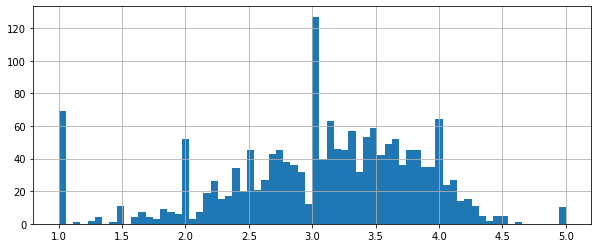

In [54]:
plt.figure(figsize=(10,4))
meanrating['rating'].hist(bins=70)

In [56]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t',names= columns,index_col=0 )
newdf = df.drop(columns=['timestamp'])
newdf.head()

,movieid,rating
userid,,
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1


In [57]:
#Creating a new dataframe with the movie title and the rating from each user.
moviemat = titles.pivot_table(index='userid', columns ='movieid', values='rating')
moviemat.head(10)

movieid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
moviemat.shape

(943, 1682)

In [59]:
#Replacing the missing values with the mean of the movie
newMatrix = moviemat.fillna(moviemat.mean()).round(2)

In [60]:
newMatrix.head(10)

movieid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userid,,,,,,,,,,,,,,,,,,,,,
1,5.00,3.00,4.00,3.00,3.0,5.00,4.0,1.0,5.0,3.00,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.00,3.21,3.03,3.55,3.3,3.58,3.8,4.0,3.9,2.00,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.88,3.21,3.03,3.55,3.3,3.58,3.8,4.0,3.9,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.88,3.21,3.03,3.55,3.3,3.58,3.8,4.0,3.9,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,4.00,3.00,3.03,3.55,3.3,3.58,3.8,4.0,3.9,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
6,4.00,3.21,3.03,3.55,3.3,3.58,2.0,4.0,4.0,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
7,3.88,3.21,3.03,5.00,3.3,3.58,5.0,5.0,5.0,4.00,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
8,3.88,3.21,3.03,3.55,3.3,3.58,3.0,4.0,3.9,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
9,3.88,3.21,3.03,3.55,3.3,5.00,4.0,4.0,3.9,3.83,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [61]:
features = ['userid','movieid','rating','timestamp']
traindataset = pd.read_csv('ml-100k/u1.base', sep ='\t', names=features)
print(traindataset.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [62]:
traindataset.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [63]:
traindataset.sum()

userid             42013256
movieid            34056416
rating               282268
timestamp    70685157472259
dtype: int64

In [64]:
traindataset.shape

(80000, 4)

In [65]:
features = ['userid','movieid','rating','timestamp']
testdataset = pd.read_csv('ml-100k/u1.test', sep ='\t', names=features)
print(testdataset.head())

   userid  movieid  rating  timestamp
0       1        6       5  887431973
1       1       10       3  875693118
2       1       12       5  878542960
3       1       14       5  874965706
4       1       17       3  875073198


In [66]:
testdataset.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [67]:
testdataset.sum()

userid              4235219
movieid             8496597
rating                70718
timestamp    17667727676603
dtype: int64

In [68]:
testdataset.shape

(20000, 4)

In [69]:
#spliting datasets
X = traindataset.iloc[:,0:2]
y = traindataset.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [70]:
#Feature Scaling 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [71]:
math.sqrt(len(y_test))

126.49110640673517

In [73]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [74]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [75]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [76]:
y_pred

array([3, 4, 3, ..., 3, 3, 4], dtype=int64)

In [77]:
#evaluation model
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[  10    0  289  570   33]
 [   5    0  535 1307   54]
 [  10    0 1165 3136  140]
 [  13    0 1162 4089  165]
 [   3    0  557 2615  142]]


In [78]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17149855116254667


In [79]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.337875


In [80]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.4461875

# U2.BASE DATASET AND U2.TEST DATASET

In [81]:
features = ['userid','movieid','rating','timestamp']
traindataset2 = pd.read_csv('ml-100k/u2.base', sep ='\t', names=features)
print(traindataset2.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1        4       3  876893119
2       1        5       3  889751712
3       1        6       5  887431973
4       1        7       4  875071561


In [82]:
traindataset2.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [83]:
traindataset2.sum()

userid             39560651
movieid            33999239
rating               282117
timestamp    70683739483331
dtype: int64

In [84]:
traindataset2.shape

(80000, 4)

In [85]:
features = ['userid','movieid','rating','timestamp']
testdataset2 = pd.read_csv('ml-100k/u2.test', sep ='\t', names=features)
print(testdataset2.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        8       1  875072484
3       1        9       5  878543541
4       1       21       1  878542772


In [86]:
testdataset2.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [87]:
testdataset2.sum()

userid              6687824
movieid             8553774
rating                70869
timestamp    17669145665531
dtype: int64

In [88]:
testdataset2.shape

(20000, 4)

In [90]:
#spliting datasets
X2 = traindataset2.iloc[:,0:2]
y2 = traindataset2.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0, test_size = 0.2)

In [91]:
#Feature Scaling 
sc_X2 = StandardScaler()
X_train = sc_X2.fit_transform(X_train)
X_test = sc_X2.transform(X_test)

In [92]:
math.sqrt(len(y_test))

126.49110640673517

In [93]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [94]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [95]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [96]:
y_pred

array([3, 4, 3, ..., 3, 4, 5], dtype=int64)

In [97]:
#evaluation model
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[  20    2  293  595   18]
 [  12    2  547 1217   36]
 [   5    4 1191 3137  114]
 [  18    4 1149 4076  171]
 [  10    2  595 2660  122]]


In [98]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17441159261279868


In [99]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3381875


In [100]:
#mean_squared_error

mean_squared_error(y_pred, y_test)

1.4313125

# U3.BASE DATASET AND U3.TEST DATASET

In [102]:
a=np.array([[5,1231,53,123],[1234,123,2,4],[123,455,12,86]])

In [103]:
a

array([[   5, 1231,   53,  123],
       [1234,  123,    2,    4],
       [ 123,  455,   12,   86]])

In [109]:
a.argsort()

array([[0, 2, 3, 1],
       [2, 3, 1, 0],
       [2, 3, 0, 1]], dtype=int64)

In [124]:
a.argsort()[:,2:]# stunları alıyor soldan sağ doğru gidyor

array([[3, 1],
       [1, 0],
       [0, 1]], dtype=int64)

In [133]:
a.argsort()[:,2:][:,::-1] # doğru çalışıyor indexleri doğru arlıyor

array([[1, 3],
       [0, 1],
       [1, 0]], dtype=int64)

In [134]:
features = ['userid','movieid','rating','timestamp']
traindataset3 = pd.read_csv('ml-100k/u3.base', sep ='\t', names=features)
print(traindataset3.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        6       5  887431973


In [135]:
#checkng for null values
traindataset3.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [136]:
traindataset3.sum()

userid             36431188
movieid            34046417
rating               282487
timestamp    70678510410518
dtype: int64

In [137]:
traindataset3.shape

(80000, 4)

In [139]:
features = ['userid','movieid','rating','timestamp']
testdataset3 = pd.read_csv('ml-100k/u3.test', sep ='\t', names=features)
print(testdataset3.head())

   userid  movieid  rating  timestamp
0       1        5       3  889751712
1       1       11       2  875072262
2       1       16       5  878543541
3       1       25       4  875071805
4       1       35       1  878542420


In [140]:
testdataset3.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [141]:
testdataset3.sum()

userid              9817287
movieid             8506596
rating                70499
timestamp    17674374738344
dtype: int64

In [142]:
testdataset3.shape

(20000, 4)

In [144]:
#spliting datasets
X3 = traindataset3.iloc[:,0:2]
y3 = traindataset3.iloc[:,2]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size = 0.2)

In [145]:
#Feature Scaling 
sc_X3 = StandardScaler()
X3_train = sc_X3.fit_transform(X3_train)
X3_test = sc_X3.transform(X3_test)

In [146]:
math.sqrt(len(y_test))

126.49110640673517

In [147]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [148]:
#fiting the model
classifier.fit(X3_train, y3_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [149]:
#predicting the test set results
y_pred = classifier.predict(X3_test)

In [150]:
y_pred

array([4, 3, 4, ..., 3, 4, 4], dtype=int64)

In [151]:
#evaluation model
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

[[   4    1  226  661   36]
 [   7    2  417 1317   71]
 [  10    2 1084 3215  140]
 [  19    1 1272 3922  204]
 [  10    3  783 2475  118]]


In [152]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.1589050898769749


In [153]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.320625


In [154]:
mean_squared_error(y_pred, y_test)

1.5639375

# U4.BASE DATASET AND U4.TEST DATASET

In [157]:
features = ['userid','movieid','rating','timestamp']
traindataset4 = pd.read_csv('ml-100k/u4.base', sep ='\t', names=features)
print(traindataset4.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        5       3  889751712
4       1        6       5  887431973


In [158]:
traindataset4.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [159]:
traindataset4.sum()

userid             33828257
movieid            34096233
rating               282549
timestamp    70682380062248
dtype: int64

In [160]:
traindataset4.shape

(80000, 4)

In [161]:
features = ['userid','movieid','rating','timestamp']
testdataset4 = pd.read_csv('ml-100k/u4.test', sep ='\t', names=features)
print(testdataset4.head())

   userid  movieid  rating  timestamp
0       1        4       3  876893119
1       1        7       4  875071561
2       1       42       5  876892425
3       1       43       4  878542869
4       1       55       5  875072688


In [162]:
testdataset4.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [163]:
testdataset4.sum()

userid             12420218
movieid             8456780
rating                70437
timestamp    17670505086614
dtype: int64

In [164]:
testdataset4.shape

(20000, 4)

In [165]:
#spliting datasets
X4 = traindataset4.iloc[:,0:2]
y4 = traindataset4.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X4, y4, random_state=0, test_size = 0.2)

In [166]:
#Feature Scaling 
sc_X4 = StandardScaler()
X_train = sc_X4.fit_transform(X_train)
X_test = sc_X4.transform(X_test)

In [167]:
math.sqrt(len(y_test))

126.49110640673517

In [168]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [169]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [170]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [171]:
y_pred

array([4, 3, 4, ..., 3, 4, 1], dtype=int64)

In [172]:
#evaluation model
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

[[  34    0  329  653   27]
 [  11    0  493 1242   52]
 [  22    1 1078 3133  120]
 [  17    0 1055 4136  206]
 [   8    0  533 2700  150]]


In [173]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17792544610905148


In [174]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.337375


In [175]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.4775625

# U5.BASE DATASET AND U5.TEST DATASET

In [177]:
features = ['userid','movieid','rating','timestamp']
traindataset5 = pd.read_csv('ml-100k/u5.base', sep ='\t', names=features)
print(traindataset5.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        4       3  876893119
3       1        5       3  889751712
4       1        6       5  887431973


In [178]:
traindataset5.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [179]:
traindataset5.sum()

userid             33160548
movieid            34013747
rating               282523
timestamp    70681753167092
dtype: int64

In [180]:
traindataset5.shape

(80000, 4)

In [181]:
features = ['userid','movieid','rating','timestamp']
testdataset5 = pd.read_csv('ml-100k/u5.test', sep ='\t', names=features)
print(testdataset5.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1       13       5  875071805
2       1       15       5  875071608
3       1       18       4  887432020
4       1       19       5  875071515


In [182]:
testdataset5.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [183]:
testdataset5.sum()

userid             13087927
movieid             8539266
rating                70463
timestamp    17671131981770
dtype: int64

In [184]:
testdataset5.shape

(20000, 4)

In [185]:
X5 = traindataset5.iloc[:,0:2]
y5 = traindataset5.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=0, test_size = 0.2)

In [186]:
sc_X5 = StandardScaler()
X_train = sc_X5.fit_transform(X_train)
X_test = sc_X5.transform(X_test)

In [187]:
math.sqrt(len(y_test))

126.49110640673517

In [188]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [189]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [190]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [191]:
y_pred

array([4, 3, 2, ..., 5, 2, 4], dtype=int64)

In [192]:
#evaluation model
cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

[[  64   64  353  373   95]
 [  48  127  644  768  210]
 [ 105  267 1630 1916  503]
 [  79  319 1848 2478  722]
 [  40  171 1099 1577  500]]


In [193]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.21951174128400147


In [194]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.2999375


In [195]:
#mean_squared_error

mean_squared_error(y_pred, y_test)

1.8331875

# MERGING U.USER DATASET TO U1.BASE DATASET

In [196]:
features = ['userid','movieid','rating','timestamp']
Utraindataset = pd.read_csv('ml-100k/u1.base', sep ='\t', names=features)
print(Utraindataset.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [197]:
features = ['userid','age','gender','occupation','zipcode']
uUser = pd.read_csv('ml-100k/u.user', sep ='|', names=features)
print(uUser.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [198]:
features = ['userid','movieid','rating','timestamp']
Utestdataset = pd.read_csv('ml-100k/u1.test', sep ='\t', names=features)
print(Utestdataset.head())

   userid  movieid  rating  timestamp
0       1        6       5  887431973
1       1       10       3  875693118
2       1       12       5  878542960
3       1       14       5  874965706
4       1       17       3  875073198


In [199]:
Utraindataset = pd.merge(Utraindataset,uUser, on='userid')

In [200]:
print(Utraindataset.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        3       4  878542960   24      M  technician   85711
3       1        4       3  876893119   24      M  technician   85711
4       1        5       3  889751712   24      M  technician   85711


In [201]:
Utraindataset= Utraindataset[['userid','movieid','age','gender','occupation','zipcode','timestamp','rating']]

In [202]:
print(Utraindataset.head())

   userid  movieid  age gender  occupation zipcode  timestamp  rating
0       1        1   24      M  technician   85711  874965758       5
1       1        2   24      M  technician   85711  876893171       3
2       1        3   24      M  technician   85711  878542960       4
3       1        4   24      M  technician   85711  876893119       3
4       1        5   24      M  technician   85711  889751712       3


In [203]:
Utraindataset = pd.get_dummies(Utraindataset, columns=['occupation', 'gender'])

In [204]:
print(Utraindataset.head())

   userid  movieid  age zipcode  timestamp  rating  occupation_administrator  \
0       1        1   24   85711  874965758       5                         0   
1       1        2   24   85711  876893171       3                         0   
2       1        3   24   85711  878542960       4                         0   
3       1        4   24   85711  876893119       3                         0   
4       1        5   24   85711  889751712       3                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                   

In [205]:
Utraindataset.isnull().sum()

userid                      0
movieid                     0
age                         0
zipcode                     0
timestamp                   0
rating                      0
occupation_administrator    0
occupation_artist           0
occupation_doctor           0
occupation_educator         0
occupation_engineer         0
occupation_entertainment    0
occupation_executive        0
occupation_healthcare       0
occupation_homemaker        0
occupation_lawyer           0
occupation_librarian        0
occupation_marketing        0
occupation_none             0
occupation_other            0
occupation_programmer       0
occupation_retired          0
occupation_salesman         0
occupation_scientist        0
occupation_student          0
occupation_technician       0
occupation_writer           0
gender_F                    0
gender_M                    0
dtype: int64

In [206]:
Utraindataset = Utraindataset.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset = Utraindataset.drop(['zipcode'], axis =1)

In [207]:
print(Utraindataset.head(5))

   userid  movieid  age  timestamp  rating  occupation_administrator  \
0       1        1   24  874965758       5                         0   
1       1        2   24  876893171       3                         0   
2       1        3   24  878542960       4                         0   
3       1        4   24  876893119       3                         0   
4       1        5   24  889751712       3                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [208]:
Utraindataset= Utraindataset[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [209]:
Utraindataset.sum()

userid                            42013256
movieid                           34056416
age                                2626147
gender_M                             59093
occupation_librarian                  3992
occupation_lawyer                      983
occupation_homemaker                   253
occupation_healthcare                 2428
occupation_executive                  2576
occupation_entertainment              1442
occupation_writer                     4575
occupation_technician                 2778
occupation_student                   17901
occupation_scientist                  1743
occupation_salesman                    726
occupation_retired                    1101
occupation_programmer                 6190
occupation_other                      9117
occupation_marketing                  1461
occupation_engineer                   6912
occupation_educator                   7467
occupation_doctor                      350
occupation_administrator              5594
occupation_

In [210]:
Utraindataset.shape

(80000, 26)

In [212]:
#spliting datasets
XU = Utraindataset.iloc[:,0:24]
yU = Utraindataset.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU, yU, random_state=0, test_size = 0.2)

In [213]:
#Feature Scaling 
sc_XU = StandardScaler()
X_train = sc_XU.fit_transform(X_train)
X_test = sc_XU.transform(X_test)

In [214]:
math.sqrt(len(y_test))

126.49110640673517

In [215]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [216]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [217]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [218]:
y_pred

array([5, 4, 3, ..., 4, 4, 4], dtype=int64)

In [219]:
#evaluation model
cmU = confusion_matrix(y_test, y_pred)
print(cmU)

[[ 216  113  233  246   94]
 [ 134  290  725  581  171]
 [ 128  400 1780 1717  426]
 [ 137  302 1646 2522  822]
 [  78  133  656 1436 1014]]


In [220]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.363875


In [221]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.577

# MERGING U.USER DATASET TO U2.BASE DATASET AND USING U2.TEST

In [222]:
#mporting u2.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset2 = pd.read_csv('ml-100k/u2.base', sep ='\t', names=features)
print(Utraindataset2.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1        4       3  876893119
2       1        5       3  889751712
3       1        6       5  887431973
4       1        7       4  875071561


In [223]:
#mporting u2.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser2 = pd.read_csv('ml-100k/u.user', sep ='|', names=features)
print(uUser2.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [224]:
#merging the u2.base dataset with the u.user dataset
Utraindataset2 = pd.merge(Utraindataset2,uUser, on='userid')

In [225]:
print(Utraindataset2.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        3       4  878542960   24      M  technician   85711
1       1        4       3  876893119   24      M  technician   85711
2       1        5       3  889751712   24      M  technician   85711
3       1        6       5  887431973   24      M  technician   85711
4       1        7       4  875071561   24      M  technician   85711


In [226]:
Utraindataset2 = pd.get_dummies(Utraindataset2, columns=['occupation', 'gender'])

In [227]:
print(Utraindataset2.head())

   userid  movieid  rating  timestamp  age zipcode  occupation_administrator  \
0       1        3       4  878542960   24   85711                         0   
1       1        4       3  876893119   24   85711                         0   
2       1        5       3  889751712   24   85711                         0   
3       1        6       5  887431973   24   85711                         0   
4       1        7       4  875071561   24   85711                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                   

In [228]:
Utraindataset2 = Utraindataset2.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset2 = Utraindataset2.drop(['zipcode'], axis =1)

In [229]:
print(Utraindataset2.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        3       4  878542960   24                         0   
1       1        4       3  876893119   24                         0   
2       1        5       3  889751712   24                         0   
3       1        6       5  887431973   24                         0   
4       1        7       4  875071561   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [230]:
Utraindataset2= Utraindataset2[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [231]:
Utraindataset2.head(5)

,userid,movieid,age,gender_M,occupation_librarian,occupation_lawyer,occupation_homemaker,occupation_healthcare,occupation_executive,occupation_entertainment,...,occupation_programmer,occupation_other,occupation_marketing,occupation_engineer,occupation_educator,occupation_doctor,occupation_administrator,occupation_artist,timestamp,rating
0,1,3,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,878542960,4
1,1,4,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,876893119,3
2,1,5,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,889751712,3
3,1,6,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,887431973,5
4,1,7,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,875071561,4


In [232]:
Utraindataset2.shape

(80000, 26)

In [233]:
#spliting datasets
XU2 = Utraindataset2.iloc[:,0:24]
yU2 = Utraindataset2.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU2, yU2, random_state=0, test_size = 0.2)

In [234]:
#Feature Scaling 
sc_XU2 = StandardScaler()
X_trainu2 = sc_XU2.fit_transform(X_train)
X_testu2 = sc_XU2.transform(X_test)

In [235]:
math.sqrt(len(y_test))

126.49110640673517

In [236]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [237]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [238]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [240]:
y_pred

array([4, 5, 4, ..., 4, 2, 4], dtype=int64)

In [241]:
#evaluation model
cmU2 = confusion_matrix(y_test, y_pred)
print(cmU2)

[[ 101   89  348  304   86]
 [  67  157  673  741  176]
 [ 128  313 1657 1898  455]
 [ 114  322 1838 2460  684]
 [  66  174 1058 1590  501]]


In [242]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.30475


In [243]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.794

# MERGING U.USER DATASET TO U3.BASE DATASET AND USING U3.TEST

In [244]:
#mporting u3.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset3 = pd.read_csv('ml-100k/u3.base', sep ='\t', names=features)
print(Utraindataset3.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        6       5  887431973


In [245]:
#mporting u3.base dataset 
features = ['userid','age','gender','occupation','zipcode']
uUser3 = pd.read_csv('ml-100k/u.user', sep ='|', names=features)
print(uUser3.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [246]:
#merging the u3.base dataset with the u.user dataset
Utraindataset3 = pd.merge(Utraindataset3,uUser, on='userid')

In [247]:
Utraindataset3 = pd.get_dummies(Utraindataset3, columns=['occupation', 'gender'])

In [248]:
Utraindataset3.head(5)

,userid,movieid,rating,timestamp,age,zipcode,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,...,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,gender_F,gender_M
0,1,1,5,874965758,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,3,876893171,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,3,4,878542960,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,4,3,876893119,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,6,5,887431973,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [249]:
Utraindataset3 = Utraindataset3.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset3 = Utraindataset3.drop(['zipcode'], axis =1)

In [250]:
print(Utraindataset3.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        3       4  878542960   24                         0   
3       1        4       3  876893119   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [251]:
Utraindataset3= Utraindataset3[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [252]:
Utraindataset3.shape

(80000, 26)

In [253]:
#spliting datasets
XU3 = Utraindataset3.iloc[:,0:24]
yU3 = Utraindataset3.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU3, yU3, random_state=0, test_size = 0.2)

In [254]:
#Feature Scaling 
sc_XU3 = StandardScaler()
X_trainu3 = sc_XU3.fit_transform(X_train)
X_testu3 = sc_XU3.transform(X_test)

In [255]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [256]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [257]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [258]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [259]:
y_pred

array([3, 2, 3, ..., 2, 3, 4], dtype=int64)

In [260]:
#evaluation model
cmU3 = confusion_matrix(y_test, y_pred)
print(cmU3)

[[ 131   83  318  323   89]
 [  95  169  675  711  221]
 [ 147  295 1576 1810  480]
 [ 121  311 1823 2503  670]
 [  54  185 1045 1573  592]]


In [261]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3106875


In [262]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.813125

# MERGING U.USER DATASET TO U4.BASE DATASET AND USING U4.TEST

In [265]:
#mporting u4.base dataset ml-100k/
features = ['userid','movieid','rating','timestamp']
Utraindataset4 = pd.read_csv('ml-100k/u4.base', sep ='\t', names=features)
print(Utraindataset4.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        5       3  889751712
4       1        6       5  887431973


In [266]:
#mporting u4.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser4 = pd.read_csv('ml-100k/u.user', sep ='|', names=features)
print(uUser4.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [267]:
#merging the u4.base dataset with the u.user dataset
Utraindataset4 = pd.merge(Utraindataset4,uUser, on='userid')

In [268]:
print(Utraindataset4.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        3       4  878542960   24      M  technician   85711
3       1        5       3  889751712   24      M  technician   85711
4       1        6       5  887431973   24      M  technician   85711


In [269]:
Utraindataset4 = pd.get_dummies(Utraindataset4, columns=['occupation', 'gender'])

In [270]:
Utraindataset4.head(5)

,userid,movieid,rating,timestamp,age,zipcode,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,...,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,gender_F,gender_M
0,1,1,5,874965758,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,3,876893171,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,3,4,878542960,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,5,3,889751712,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,6,5,887431973,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [271]:
Utraindataset4 = Utraindataset4.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset4 = Utraindataset4.drop(['zipcode'], axis =1)

In [272]:
print(Utraindataset4.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        3       4  878542960   24                         0   
3       1        5       3  889751712   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [273]:
Utraindataset4= Utraindataset4[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [274]:
Utraindataset4.shape

(80000, 26)

In [275]:
#spliting datasets
XU4 = Utraindataset4.iloc[:,0:24]
yU4 = Utraindataset4.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU4, yU4, random_state=0, test_size = 0.2)

In [276]:
#Feature Scaling 
sc_XU4 = StandardScaler()
X_trainu4 = sc_XU4.fit_transform(X_train)
X_testu4 = sc_XU4.transform(X_test)

In [277]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [278]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [279]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [280]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [281]:
y_pred

array([4, 3, 3, ..., 5, 4, 4], dtype=int64)

In [282]:
#evaluation model
cmU4 = confusion_matrix(y_test, y_pred)
print(cmU4)

[[ 144  106  344  368   81]
 [  80  145  700  699  174]
 [ 118  309 1541 1928  458]
 [ 121  286 1835 2470  702]
 [  58  154 1044 1568  567]]


In [283]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3041875


In [284]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.7875625

# MERGING U.USER DATASET TO U5.BASE DATASET AND USING U5.TEST

In [286]:
#mporting u4.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset5 = pd.read_csv('ml-100k/u5.base', sep ='\t', names=features)
print(Utraindataset5.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        4       3  876893119
3       1        5       3  889751712
4       1        6       5  887431973


In [287]:
#mporting u4.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser5 = pd.read_csv('ml-100k/u.user', sep ='|', names=features)
print(uUser5.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [288]:
#merging the u4.base dataset with the u.user dataset
Utraindataset5 = pd.merge(Utraindataset5,uUser, on='userid')

In [289]:
print(Utraindataset5.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        4       3  876893119   24      M  technician   85711
3       1        5       3  889751712   24      M  technician   85711
4       1        6       5  887431973   24      M  technician   85711


In [290]:
Utraindataset5 = pd.get_dummies(Utraindataset5, columns=['occupation', 'gender'])

In [291]:
Utraindataset5.head(5)

,userid,movieid,rating,timestamp,age,zipcode,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,...,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,gender_F,gender_M
0,1,1,5,874965758,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,3,876893171,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,4,3,876893119,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,5,3,889751712,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,6,5,887431973,24,85711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [292]:
Utraindataset5 = Utraindataset5.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset5 = Utraindataset5.drop(['zipcode'], axis =1)

In [293]:
print(Utraindataset5.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        4       3  876893119   24                         0   
3       1        5       3  889751712   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [294]:
Utraindataset5= Utraindataset5[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [295]:
Utraindataset5.shape

(80000, 26)

In [296]:
#spliting datasets
XU5 = Utraindataset5.iloc[:,0:24]
yU5 = Utraindataset5.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU5, yU5, random_state=0, test_size = 0.2)

In [297]:
#Feature Scaling 
sc_XU5 = StandardScaler()
X_trainu5 = sc_XU5.fit_transform(X_train)
X_testu5 = sc_XU5.transform(X_test)

In [298]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [299]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [300]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [301]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [302]:
y_pred

array([2, 4, 4, ..., 4, 3, 3], dtype=int64)

In [303]:
#evaluation model
cmU5 = confusion_matrix(y_test, y_pred)
print(cmU5)

[[ 143   83  318  332   73]
 [  66  171  650  734  176]
 [ 126  311 1581 1923  480]
 [ 122  335 1804 2523  662]
 [  68  148  991 1628  552]]


In [304]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.310625


In [305]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.7700625

# TASK2 - FINDING RECOMMENDED MOVIES BASED ON MOVIE ID

In [311]:
# Get ratings people give to movies
features = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=features, usecols=range(3))

In [312]:
ratings.head(5)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [313]:
ratings.shape

(100000, 3)

In [314]:
# Divide film ratings into total size and average
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})

In [315]:
movieProperties.shape

(1682, 2)

In [316]:
movieProperties.head(5)

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [317]:
# Normalize rating sizes of movies
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [318]:
movieNormalizedNumRatings.head(5)

,size
movie_id,
1,0.774914
2,0.223368
3,0.152921
4,0.357388
5,0.146048


In [319]:
movieNormalizedNumRatings.shape

(1682, 1)

In [321]:
# Get film data
movieDict = {}
with open('ml-100k/u.item', mode='r', encoding='latin-1') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))

In [322]:
print(movieDict)

{1: ('Toy Story (1995)', [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.7749140893470791, 3.8783185840707963), 2: ('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22336769759450173, 3.2061068702290076), 3: ('Four Rooms (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.15292096219931273, 3.033333333333333), 4: ('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35738831615120276, 3.550239234449761), 5: ('Copycat (1995)', [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.14604810996563575, 3.302325581395349), 6: ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0429553264604811, 3.576923076923077), 7: ('Twelve Monkeys (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 0.6718213058419243, 3.798469387755102), 8: ('Babe (1995)', [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.37457044673

In [323]:
# Function to calculate distances between movies
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [324]:
# Get the neighbor K of the given film
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

# K IS THE AMOUNT OF HOW MANY NEAREST NEIGHBORS YOU WANT 
# CHANGE THAT VALUE IF YOU WANT MORE 
K = 10 
avgRating = 0
#### THE NUMBER IN THE BRACKET IS THE MOVIE ID 
### CHANGE THE ID IF YOU WANT TO FIND NEAREST NEIGHBORS FOR ANOTHER MOVIE BASED ON THE MOVIE ID
neighbors = getNeighbors(152, K) 
print("Nearest Neighbors:")
print('')
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Nearest Neighbors:

Delicatessen (1991) 3.876923076923077
Junior (1994) 3.022222222222222
Coneheads (1993) 2.2195121951219514
Mystery Science Theater 3000: The Movie (1996) 3.4307692307692306
Visitors, The (Visiteurs, Les) (1993) 3.5
It Happened One Night (1934) 4.012345679012346
Bob Roberts (1992) 3.7411764705882353
Better Off Dead... (1985) 3.569620253164557
Bullets Over Broadway (1994) 3.7209302325581395
My Fellow Americans (1996) 3.1627906976744184


In [325]:
##### Average rating score calculated based on film neighbors
avgRating /= float(K)  #### avgRating = avgRating / float(K)
print("\nEstimated avg. rating:")
print(avgRating)


Estimated avg. rating:
3.425629005803418


In [326]:
# Real avgerage rating
print("\nReal avg. rating:")
print(movieDict[1][3])


Real avg. rating:
3.8783185840707963


# TASK2 EXTENDED - User based recommendations

In [327]:
ratings.head(5)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [328]:
ratings
#CHANGE THE USER NUMBER TO A SPECIFIC USER YOU WANT TO FIND RECOMMENDED MOVIES
user = 45

user_film = ratings[ratings['user_id']==user]
user_film = user_film[user_film['rating']==5]

user_film_ids = user_film['movie_id'].values
rec_list = [] 


for film in user_film_ids:
    recs = getNeighbors(film, 5)
    rec_list.append(recs)
    
flat_list = []

for sublist in rec_list:
    for item in sublist:
        flat_list.append(item)
        
        
flat_list.sort()
print(flat_list)

[12, 56, 56, 82, 95, 98, 100, 121, 125, 127, 151, 152, 154, 168, 171, 172, 173, 174, 181, 187, 197, 222, 222, 228, 230, 237, 258, 268, 269, 275, 294, 313, 367, 393, 403, 433, 577, 728, 845, 1472]


In [329]:
countList = {i:flat_list.count(i) for i in flat_list}
print (countList)

{12: 1, 56: 2, 82: 1, 95: 1, 98: 1, 100: 1, 121: 1, 125: 1, 127: 1, 151: 1, 152: 1, 154: 1, 168: 1, 171: 1, 172: 1, 173: 1, 174: 1, 181: 1, 187: 1, 197: 1, 222: 2, 228: 1, 230: 1, 237: 1, 258: 1, 268: 1, 269: 1, 275: 1, 294: 1, 313: 1, 367: 1, 393: 1, 403: 1, 433: 1, 577: 1, 728: 1, 845: 1, 1472: 1}


In [330]:
films1111 = {k: v for k, v in sorted(countList.items(), key=lambda item: item[1])}

movie_recs = list(films1111.keys())[-5:]
print(movie_recs)

movie_recs.reverse()

print(movie_recs)

[728, 845, 1472, 56, 222]
[222, 56, 1472, 845, 728]


In [331]:
print("Nearest Neighbors based on user id:")
print('')  
final_recs = []
for movieid in movie_recs:
    print(titles[titles['movieid']==movieid]['movie title'].values[0])
    final_recs.append(titles[titles['movieid']==movieid]['movie title'].values[0])

print(final_recs)

Nearest Neighbors based on user id:

Star Trek: First Contact (1996)
Pulp Fiction (1994)
Visitors, The (Visiteurs, Les) (1993)
That Thing You Do! (1996)
Junior (1994)
['Star Trek: First Contact (1996)', 'Pulp Fiction (1994)', 'Visitors, The (Visiteurs, Les) (1993)', 'That Thing You Do! (1996)', 'Junior (1994)']


# TASK3 - EXTEND OF TASK2 (INCLUDING U.USER DATASET)

In [333]:
# Get ratings people give to movies
features = ['user_id', 'movie_id', 'rating']
newRatings = pd.read_csv('ml-100k/u.data', sep='\t', names=features, usecols=range(3))

In [335]:
#importing u.user dataset 
features = ['user_id', 'age', 'gender','occupations','zip code']
userData = pd.read_csv('ml-100k/u.user',sep='|',encoding='latin-1', names= features)
print(users.columns.values)

['userid' 'age' 'gender' 'occupations' 'zip code']


In [336]:
userData.head()

,user_id,age,gender,occupations,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [337]:
userData.shape

(943, 5)

In [338]:
newRatings.head(5)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [339]:
newRatings.shape

(100000, 3)

In [340]:
newRatings2 = pd.merge(userData, newRatings, on='user_id')

In [341]:
newRatings2.head(5)

,user_id,age,gender,occupations,zip code,movie_id,rating
0,1,24,M,technician,85711,61,4
1,1,24,M,technician,85711,189,3
2,1,24,M,technician,85711,33,4
3,1,24,M,technician,85711,160,4
4,1,24,M,technician,85711,20,4


In [342]:
newRatings2.shape

(100000, 7)

In [344]:
#repeat the same process from task2
movieProperties2 = newRatings2.groupby('movie_id').agg({'rating': [np.size, np.mean]})

In [345]:
movieProperties2.head(5)

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [346]:
movieProperties2.shape

(1682, 2)

In [347]:
# Normalize rating sizes of movies
movieNumRatings2 = pd.DataFrame(movieProperties2['rating']['size'])
movieNormalizedNumRatings = movieNumRatings2.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [348]:
movieNormalizedNumRatings.head(5)

,size
movie_id,
1,0.774914
2,0.223368
3,0.152921
4,0.357388
5,0.146048


In [349]:
movieNormalizedNumRatings.shape

(1682, 1)

In [351]:
# Get film data
movieDict = {}
with open('ml-100k/u.item', mode='r', encoding='latin-1') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))

In [352]:
print(movieDict)

{1: ('Toy Story (1995)', [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.7749140893470791, 3.8783185840707963), 2: ('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22336769759450173, 3.2061068702290076), 3: ('Four Rooms (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.15292096219931273, 3.033333333333333), 4: ('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35738831615120276, 3.550239234449761), 5: ('Copycat (1995)', [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.14604810996563575, 3.302325581395349), 6: ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0429553264604811, 3.576923076923077), 7: ('Twelve Monkeys (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 0.6718213058419243, 3.798469387755102), 8: ('Babe (1995)', [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.37457044673

In [353]:
# Function to calculate distances between movies
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [354]:
# Get the neighbor K of the given film
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors


K = 5 # AMOUNT OF HOW MANY NEAREST NEIGHBORS YOU WANT #### CHANGE THAT VALUE IF YOU WANT MORE 
avgRating = 0
neighbors = getNeighbors(300, K) #### THE NUMBER IN THE BRACKET IS THE MOVIE ID ### CHANGE THE ID IF YOU WANT TO FIND NEAREST NEIGHBORS FOR ANOTHER MOVIE
print("Nearest Neighbors:")
print('')
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Nearest Neighbors:

Fugitive, The (1993) 4.044642857142857
Rock, The (1996) 3.693121693121693
Broken Arrow (1996) 3.031496062992126
Die Hard (1988) 3.8724279835390947
Dante's Peak (1997) 2.933333333333333


In [355]:
##### Average rating score calculated based on film neighbors
avgRating /= float(K)  #### avgRating = avgRating / float(K)
print("\nEstimated avg. rating:")
print(avgRating)


Estimated avg. rating:
3.515004386025821


In [356]:
# Real avgerage rating
print("\nReal avg. rating:")
print(movieDict[1][3])


Real avg. rating:
3.8783185840707963


# TASK3 EXTENDED - User based recommendations

In [357]:
Utraindataset5.head(5)

,userid,movieid,age,gender_M,occupation_librarian,occupation_lawyer,occupation_homemaker,occupation_healthcare,occupation_executive,occupation_entertainment,...,occupation_programmer,occupation_other,occupation_marketing,occupation_engineer,occupation_educator,occupation_doctor,occupation_administrator,occupation_artist,timestamp,rating
0,1,1,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,874965758,5
1,1,2,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,876893171,3
2,1,4,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,876893119,3
3,1,5,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,889751712,3
4,1,6,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,887431973,5


In [358]:
Utraindataset5
#CHANGE THE USER NUMBER TO A SPECIFIC USER YOU WANT TO FIND RECOMMENDED MOVIES
user = 45

#change the ##Utraindataset5 to another dataset that was trained above to find simalar users and recommendations
user_film = Utraindataset5[Utraindataset5['userid']==user]
user_film = user_film[user_film['rating']==5]

user_film_ids = user_film['movieid'].values
rec_list = [] 


for film in user_film_ids:
    recs = getNeighbors(film, 5)
    rec_list.append(recs)
    
flat_list = []

for sublist in rec_list:
    for item in sublist:
        flat_list.append(item)
        
        
flat_list.sort()
print(flat_list)

[12, 56, 56, 82, 95, 98, 100, 121, 125, 127, 151, 152, 154, 168, 171, 172, 173, 174, 181, 187, 197, 222, 222, 228, 230, 237, 258, 268, 269, 275, 294, 313, 367, 393, 403, 433, 577, 728, 845, 1472]


In [359]:
countList = {i:flat_list.count(i) for i in flat_list}
print (countList)

{12: 1, 56: 2, 82: 1, 95: 1, 98: 1, 100: 1, 121: 1, 125: 1, 127: 1, 151: 1, 152: 1, 154: 1, 168: 1, 171: 1, 172: 1, 173: 1, 174: 1, 181: 1, 187: 1, 197: 1, 222: 2, 228: 1, 230: 1, 237: 1, 258: 1, 268: 1, 269: 1, 275: 1, 294: 1, 313: 1, 367: 1, 393: 1, 403: 1, 433: 1, 577: 1, 728: 1, 845: 1, 1472: 1}


In [360]:
films1111 = {k: v for k, v in sorted(countList.items(), key=lambda item: item[1])}

movie_recs = list(films1111.keys())[-5:]
print(movie_recs)

movie_recs.reverse()

print(movie_recs)

[728, 845, 1472, 56, 222]
[222, 56, 1472, 845, 728]


In [361]:
print("Nearest Neighbors based on user id:")
print('')  
final_recs = []
for movieid in movie_recs:
    print(titles[titles['movieid']==movieid]['movie title'].values[0])
    final_recs.append(titles[titles['movieid']==movieid]['movie title'].values[0])

print(final_recs)

Nearest Neighbors based on user id:

Star Trek: First Contact (1996)
Pulp Fiction (1994)
Visitors, The (Visiteurs, Les) (1993)
That Thing You Do! (1996)
Junior (1994)
['Star Trek: First Contact (1996)', 'Pulp Fiction (1994)', 'Visitors, The (Visiteurs, Les) (1993)', 'That Thing You Do! (1996)', 'Junior (1994)']


In [2]:
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [4]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t',names= columns )

In [5]:
df = ratings.sort_values('userid')

In [6]:
df

,userid,movieid,rating,timestamp
66567,1,55,5,875072688
62820,1,203,4,878542231
10207,1,183,5,875072262
9971,1,150,5,876892196
22496,1,68,4,875072688
...,...,...,...,...
96823,943,427,4,888639147
70902,943,12,5,888639093
84518,943,284,2,875502192
72321,943,62,3,888640003


In [7]:
high_prices = df.loc[:,'rating'].as_matrix()
low_prices = df.loc[:,'rating'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

AttributeError: 'Series' object has no attribute 'as_matrix'

In [8]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [9]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
features = pd.read_csv('ml-100k/u.data', sep='\t',names= columns )

features.shape

(100000, 4)

In [11]:
training_dataset_length = math.ceil(len(features) * .80)
print(training_dataset_length)

80000


In [12]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(features)

In [13]:
train_data = scaled_data[0:training_dataset_length  , : ]

#Splitting the data
x_train=[]
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

In [14]:
#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into 3-D array
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

In [16]:
#compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30, batch_size = 50)


Epoch 1/30
79990/79990 [==============================] - 22s 271us/step - loss: 0.0479
Epoch 2/30
79990/79990 [==============================] - 21s 261us/step - loss: 0.0450
Epoch 3/30
79990/79990 [==============================] - 21s 262us/step - loss: 0.0437
Epoch 4/30
79990/79990 [==============================] - 21s 268us/step - loss: 0.0433
Epoch 5/30
79990/79990 [==============================] - 22s 269us/step - loss: 0.0431
Epoch 6/30
79990/79990 [==============================] - 22s 273us/step - loss: 0.0429
Epoch 7/30
79990/79990 [==============================] - 21s 266us/step - loss: 0.0428
Epoch 8/30
79990/79990 [==============================] - 22s 270us/step - loss: 0.0426
Epoch 9/30
79990/79990 [==============================] - 22s 270us/step - loss: 0.0426
Epoch 10/30
79990/79990 [==============================] - 21s 263us/step - loss: 0.0425
Epoch 11/30
79990/79990 [==============================] - 21s 265us/step - loss: 0.0425
Epoch 12/30
79990/79990 [====

In [20]:
#Test data set
test_data = scaled_data[training_dataset_length - 10: , : ]

#splitting the x_test and y_test data sets
x_test = []
y_test =  features.values

for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into 3-D array
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [21]:
#check predicted values
predictions = model.predict(x_test) 
#Undo scaling
predictions = scaler.inverse_transform(predictions)

#Calculate RMSE score
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

ValueError: non-broadcastable output operand with shape (20000,1) doesn't match the broadcast shape (20000,4)

In [22]:
import tensorflow.keras as K

In [23]:
tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 65s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

In [25]:
# Fixed for our Cats & Dogs classes
NUM_CLASSES = 2

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [26]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

### 
### Below systax is available with TensorFlow 1.11 onwards but this upgrade is not available for Kaggle kernel yet
###
#import tensorflow as tf
#print(tf.__version__)
#import tensorflow as tf
#from tf.keras.applications import ResNet50
#from tf.keras.models import Sequential

In [27]:
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [28]:
#Still not talking about our train/test data or any pre-processing.

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

In [29]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.preprocessing import text, sequence
from gensim.models import KeyedVectors


EMBEDDING_FILES = [
    'ml-100k/ua.base',
    'ml-100k/ua.test'
]
NUM_MODELS = 2
BATCH_SIZE = 512
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
EPOCHS = 4
MAX_LEN = 220
IDENTITY_COLUMNS =['user_id', 'movie_id', 'rating', 'unix_timestamp']
AUX_COLUMNS = ['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
TEXT_COLUMN = 'comment_text'
TARGET_COLUMN = 'target'
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'


def build_matrix(word_index, path):
    embedding_index = KeyedVectors.load(path, mmap='r')
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        for candidate in [word, word.lower()]:
            if candidate in embedding_index:
                embedding_matrix[i] = embedding_index[candidate]
                break
    return embedding_matrix
    

def build_model(embedding_matrix, num_aux_targets):
    words = Input(shape=(None,))
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    aux_result = Dense(num_aux_targets, activation='sigmoid')(hidden)
    
    model = Model(inputs=words, outputs=[result, aux_result])
    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model
    

train_df = pd.read_csv('ml-100k/ua.base')
test_df = pd.read_csv('ml-100k/ua.test')

x_train = train_df[TEXT_COLUMN].astype(str)
y_train = train_df[TARGET_COLUMN].values
y_aux_train = train_df[AUX_COLUMNS].values
x_test = test_df[TEXT_COLUMN].astype(str)

for column in IDENTITY_COLUMNS + [TARGET_COLUMN]:
    train_df[column] = np.where(train_df[column] >= 0.5, True, False)

tokenizer = text.Tokenizer(filters=CHARS_TO_REMOVE, lower=False)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

sample_weights = np.ones(len(x_train), dtype=np.float32)
sample_weights += train_df[IDENTITY_COLUMNS].sum(axis=1)
sample_weights += train_df[TARGET_COLUMN] * (~train_df[IDENTITY_COLUMNS]).sum(axis=1)
sample_weights += (~train_df[TARGET_COLUMN]) * train_df[IDENTITY_COLUMNS].sum(axis=1) * 5
sample_weights /= sample_weights.mean()

embedding_matrix = np.concatenate(
    [build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)

checkpoint_predictions = []
weights = []

for model_idx in range(NUM_MODELS):
    model = build_model(embedding_matrix, y_aux_train.shape[-1])
    for global_epoch in range(EPOCHS):
        model.fit(
            x_train,
            [y_train, y_aux_train],
            batch_size=BATCH_SIZE,
            epochs=1,
            verbose=2,
            sample_weight=[sample_weights.values, np.ones_like(sample_weights)]
        )
        checkpoint_predictions.append(model.predict(x_test, batch_size=2048)[0].flatten())
        weights.append(2 ** global_epoch)

predictions = np.average(checkpoint_predictions, weights=weights, axis=0)

submission = pd.DataFrame.from_dict({
    'id': test_df.id,
    'prediction': predictions
})
submission.to_csv('submission.csv', index=False)

KeyError: 'comment_text'

In [31]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16


import numpy as np

In [32]:

train=pd.read_csv('ml-100k/ua.base')

df_test=pd.read_csv('ml-100k/ua.test')

In [34]:
train.head(5)


,1\t1\t5\t874965758
0,1\t2\t3\t876893171
1,1\t3\t4\t878542960
2,1\t4\t3\t876893119
3,1\t5\t3\t889751712
4,1\t6\t5\t887431973


In [41]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10

In [42]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [43]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid

In [44]:
X_train, y_train, X_test, y_test = load_cifar10_data(224, 224)

MemoryError: Unable to allocate 28.0 GiB for an array with shape (50000, 224, 224, 3) and data type float32

In [45]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [47]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [49]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,help="path to the input image")
ap.add_argument("-model", "--model", type=str, default="vgg16",help="name of pre-trained network to use")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE [-model MODEL]
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

In [50]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}
# esnure a valid model name was supplied via command line argument
if args["model"] not in MODELS.keys():
	raise AssertionError("The --model command line argument should "
		"be a key in the `MODELS` dictionary")

NameError: name 'args' is not defined